<a href="https://colab.research.google.com/github/CAPP30255-Project/DepressionDetection/blob/master/bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

from google.colab import drive
ROOT = '/content/drive'
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import sys
import torch
from os.path import join 
repo_dir = '/content/drive/MyDrive/Repos/DepressionDetection'

In [3]:
data_dir = repo_dir + '/data/Suicide_Detection.csv'

In [4]:
%cd "{repo_dir}"
#%pip install -r jj_dt_project_requirements.txt
#!pip install torchtext==0.12.0
#!pip install allennlp

/content/drive/MyDrive/Repos/DepressionDetection


In [ ]:
#!pip install --upgrade google-cloud-storage
#restrart after running this


In [ ]:
!git pull

Already up to date.


In [5]:
from torchtext.vocab import vocab as v
from data.data_process import *
from _core.bow_classifier import *
from _core.bi_LSTM import *

# Using BoW Split

In [ ]:
depression_data = dep_data(data_dir, tokenizer = "split")
depression_data.split_data(123)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [ ]:
BATCH_SIZE = 64
using_GPU = True

In [ ]:
vocab, counter = bow_classifier(depression_data.all_data)

In [ ]:
train_dataloader = data_loader_bow(depression_data.train, vocab, BATCH_SIZE, shuffle = False)
test_dataloader = data_loader_bow(depression_data.test, vocab, BATCH_SIZE, shuffle = False)
val_dataloader = data_loader_bow(depression_data.val, vocab, BATCH_SIZE, shuffle = False)


Vocab Size =  2141
Vocab Size =  2141
Vocab Size =  2141


In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 10
torch.cuda.empty_cache()
model = RNNDepressionClassifier(vocab_size = 2142,
                                    num_classes = 2, 
                                    embedding_dim = 300, 
                                    hidden_size = 100, 
                                    num_layers = 2)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.NLLLoss()
best_accuracy = 0
if using_GPU:
    model.cuda()
    loss_function.to('cuda')
accuracies=[]
for epoch in range(1, EPOCHS + 1):
    train_an_epoch(dataloader = train_dataloader,
                    model = model,
                    optimizer = optimizer, 
                    loss_fn=loss_function,
                    using_GPU = using_GPU)
    accuracy = get_accuracy(val_dataloader, model)
    if accuracy > best_accuracy:
            best_accuracy = accuracy
            with open("/content/drive/MyDrive/Repos/DepressionDetection/output/biLSTM_bow_split_best.pt", 'wb') as f:
                torch.save(model, f)
                print("New best model saved!")
    
    accuracies.append(accuracy)
    print()
    print(f'After epoch {epoch} the validation accuracy is {accuracy:.3f}.')
    print()
    
plt.plot(range(1, EPOCHS+1), accuracies)


At iteration 200 the loss is 0.694.
At iteration 400 the loss is 0.697.
At iteration 600 the loss is 0.692.
At iteration 800 the loss is 0.698.
At iteration 1000 the loss is 0.693.
At iteration 1200 the loss is 0.693.
At iteration 1400 the loss is 0.694.
At iteration 1600 the loss is 0.694.
At iteration 1800 the loss is 0.694.
At iteration 2000 the loss is 0.692.
New best model saved!

After epoch 1 the validation accuracy is 58.333.

At iteration 200 the loss is 0.693.
At iteration 400 the loss is 0.694.
At iteration 600 the loss is 0.693.
At iteration 800 the loss is 0.693.
At iteration 1000 the loss is 0.693.
At iteration 1200 the loss is 0.693.
At iteration 1400 the loss is 0.694.
At iteration 1600 the loss is 0.693.
At iteration 1800 the loss is 0.693.
At iteration 2000 the loss is 0.693.

After epoch 2 the validation accuracy is 41.667.

At iteration 200 the loss is 0.693.
At iteration 400 the loss is 0.694.
At iteration 600 the loss is 0.693.
At iteration 800 the loss is 0.692.


# Using BoW NLTK

In [ ]:
#import nltk
#nltk.download('punkt')

In [ ]:
depression_data = dep_data(data_dir, tokenizer = "NLTK")
depression_data.split_data(123)

BATCH_SIZE = 64
using_GPU = True
EPOCHS = 5

vocab, counter = bow_classifier(depression_data.all_data)
train_dataloader = data_loader_bow(depression_data.train, vocab, BATCH_SIZE, shuffle = False)
test_dataloader = data_loader_bow(depression_data.test, vocab, BATCH_SIZE, shuffle = False)
val_dataloader = data_loader_bow(depression_data.val, vocab, BATCH_SIZE, shuffle = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


Vocab Size =  1930
Vocab Size =  1930
Vocab Size =  1930


At iteration 200 the loss is 0.696.
At iteration 400 the loss is 0.696.
At iteration 600 the loss is 0.693.
At iteration 800 the loss is 0.697.
At iteration 1000 the loss is 0.693.
At iteration 1200 the loss is 0.694.
At iteration 1400 the loss is 0.694.
At iteration 1600 the loss is 0.693.
At iteration 1800 the loss is 0.692.
At iteration 2000 the loss is 0.692.
New best model saved!

After epoch 1 the validation accuracy is 41.667.

At iteration 200 the loss is 0.693.
At iteration 400 the loss is 0.694.
At iteration 600 the loss is 0.692.
At iteration 800 the loss is 0.694.
At iteration 1000 the loss is 0.693.
At iteration 1200 the loss is 0.693.
At iteration 1400 the loss is 0.693.
At iteration 1600 the loss is 0.693.
At iteration 1800 the loss is 0.693.
At iteration 2000 the loss is 0.693.

After epoch 2 the validation accuracy is 41.667.

At iteration 200 the loss is 0.693.
At iteration 400 the loss is 0.694.
At iteration 600 the loss is 0.693.
At iteration 800 the loss is 0.693.


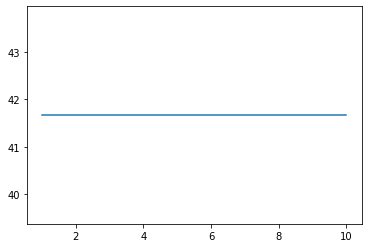

In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 10
torch.cuda.empty_cache()
model = RNNDepressionClassifier(vocab_size = 2142,
                                    num_classes = 2, 
                                    embedding_dim = 300, 
                                    hidden_size = 100, 
                                    num_layers = 2)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.NLLLoss()
best_accuracy = 0
if using_GPU:
    model.cuda()
    loss_function.to('cuda')
accuracies=[]
for epoch in range(1, EPOCHS + 1):
    train_an_epoch(dataloader = train_dataloader,
                    model = model,
                    optimizer = optimizer, 
                    loss_fn=loss_function,
                    using_GPU = using_GPU)
    accuracy = get_accuracy(val_dataloader, model)
    if accuracy > best_accuracy:
            best_accuracy = accuracy
            with open("/content/drive/MyDrive/Repos/DepressionDetection/output/biLSTM_bow_NLTK_best.pt", 'wb') as f:
                torch.save(model, f)
                print("New best model saved!")
    
    accuracies.append(accuracy)
    print()
    print(f'After epoch {epoch} the validation accuracy is {accuracy:.3f}.')
    print()
    
plt.plot(range(1, EPOCHS+1), accuracies)


# Using Glove NLTK

In [ ]:
#!pip install torchtext==0.12.0
from torchtext.vocab import vocab as v

In [ ]:
from torchtext import vocab

glove = vocab.GloVe('6B')

In [ ]:
def bow_classifier2(data):
    counter = Counter()
    for (line, label) in data:
        counter.update(line)
    vocab = v(counter, specials = ['<unk>'], special_first = True, min_freq = 1000)
    return vocab, counter

In [ ]:
vocab_words, counter = bow_classifier2(depression_data.all_data)

In [ ]:
vocab_words.set_default_index(0)

In [ ]:
glove_vector = glove.get_vecs_by_tokens(vocab_words.get_itos())

In [ ]:
def collate_fn(batch):
    vectors = torch.zeros(len(batch), len(vocab_words))
    label_mapping = {'non-suicide': 0, 'suicide': 1}
    labels = []
    for index, example in enumerate(batch):
      indexes = vocab_words(example[0])
      for w_idx in indexes:
        vectors[index, int(w_idx)] = 1
      labels.append(label_mapping.get(example[1]))
    labels = torch.tensor(labels)
    return  labels.cuda(),vectors.cuda()

In [ ]:
train_dataloader = DataLoader(depression_data.train, batch_size=BATCH_SIZE,
                              shuffle=True, 
                              collate_fn=collate_fn)
val_dataloader = DataLoader(depression_data.val, batch_size=BATCH_SIZE,
                              shuffle=False, 
                              collate_fn=collate_fn)
test_dataloader = DataLoader(depression_data.test, batch_size=BATCH_SIZE,
                             shuffle=False, 
                             collate_fn=collate_fn)

At iteration 200 the loss is 0.536.
At iteration 400 the loss is 0.551.
At iteration 600 the loss is 0.431.
At iteration 800 the loss is 0.515.
At iteration 1000 the loss is 0.449.
At iteration 1200 the loss is 0.567.
At iteration 1400 the loss is 0.395.
At iteration 1600 the loss is 0.485.
At iteration 1800 the loss is 0.659.
At iteration 2000 the loss is 0.509.
New best model saved!

After epoch 1 the validation accuracy is 66.667.

At iteration 200 the loss is 0.457.
At iteration 400 the loss is 0.478.
At iteration 600 the loss is 0.517.
At iteration 800 the loss is 0.413.
At iteration 1000 the loss is 0.556.
At iteration 1200 the loss is 0.478.
At iteration 1400 the loss is 0.526.
At iteration 1600 the loss is 0.441.
At iteration 1800 the loss is 0.456.
At iteration 2000 the loss is 0.493.

After epoch 2 the validation accuracy is 66.667.

At iteration 200 the loss is 0.564.
At iteration 400 the loss is 0.513.
At iteration 600 the loss is 0.513.
At iteration 800 the loss is 0.547.


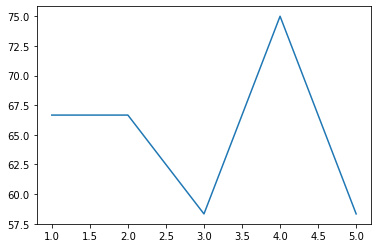

In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 5
torch.cuda.empty_cache()
model = RNNDepressionClassifier(vocab_size = 2142,
                                    num_classes = 2, 
                                    embedding_dim = 300, 
                                    hidden_size = 100, 
                                    num_layers = 2,
                                use_glove = glove_vector,
                                freeze_glove = False)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.NLLLoss()
if using_GPU:
    model.cuda()
    loss_function.to('cuda')
accuracies=[]
for epoch in range(1, EPOCHS + 1):
    train_an_epoch(dataloader = train_dataloader,
                    model = model,
                    optimizer = optimizer, 
                    loss_fn=loss_function,
                    using_GPU = using_GPU)
    accuracy = get_accuracy(val_dataloader, model)
    if accuracy > best_accuracy:
            best_accuracy = accuracy
            with open("/content/drive/MyDrive/Repos/DepressionDetection/output/biLSTM_glove_best.pt", 'wb') as f:
                torch.save(model, f)
                print("New best model saved!")
    
    accuracies.append(accuracy)
    print()
    print(f'After epoch {epoch} the validation accuracy is {accuracy:.3f}.')
    print()
    
plt.plot(range(1, EPOCHS+1), accuracies)

# Glove Split

In [6]:
depression_data = dep_data(data_dir, tokenizer = "split")
depression_data.split_data(123)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [7]:
from torchtext import vocab

glove = vocab.GloVe('6B')

In [ ]:
def bow_classifier2(data):
    counter = Counter()
    for (line, label) in data:
        counter.update(line)
    vocab = v(counter, specials = ['<unk>'], special_first = True, min_freq = 1000)
    return vocab, counter

In [ ]:
vocab_words, counter = bow_classifier2(depression_data.all_data)

In [ ]:
vocab_words.set_default_index(0)

In [ ]:
glove_vector = glove.get_vecs_by_tokens(vocab_words.get_itos())

In [ ]:
def collate_fn(batch):
    vectors = torch.zeros(len(batch), len(vocab_words))
    label_mapping = {'non-suicide': 0, 'suicide': 1}
    labels = []
    for index, example in enumerate(batch):
      indexes = vocab_words(example[0])
      for w_idx in indexes:
        vectors[index, int(w_idx)] = 1
      labels.append(label_mapping.get(example[1]))
    labels = torch.tensor(labels)
    return  labels.cuda(),vectors.cuda()

In [ ]:
train_dataloader = DataLoader(depression_data.train, batch_size=BATCH_SIZE,
                              shuffle=True, 
                              collate_fn=collate_fn)
val_dataloader = DataLoader(depression_data.val, batch_size=BATCH_SIZE,
                              shuffle=False, 
                              collate_fn=collate_fn)
test_dataloader = DataLoader(depression_data.test, batch_size=BATCH_SIZE,
                             shuffle=False, 
                             collate_fn=collate_fn)

At iteration 200 the loss is 0.555.
At iteration 400 the loss is 0.478.
At iteration 600 the loss is 0.460.
At iteration 800 the loss is 0.522.
At iteration 1000 the loss is 0.608.
At iteration 1200 the loss is 0.443.
At iteration 1400 the loss is 0.545.
At iteration 1600 the loss is 0.395.
At iteration 1800 the loss is 0.565.
At iteration 2000 the loss is 0.452.

After epoch 1 the validation accuracy is 66.667.

At iteration 200 the loss is 0.620.
At iteration 400 the loss is 0.546.
At iteration 600 the loss is 0.462.
At iteration 800 the loss is 0.581.
At iteration 1000 the loss is 0.480.
At iteration 1200 the loss is 0.427.
At iteration 1400 the loss is 0.514.
At iteration 1600 the loss is 0.494.
At iteration 1800 the loss is 0.503.
At iteration 2000 the loss is 0.478.

After epoch 2 the validation accuracy is 66.667.

At iteration 200 the loss is 0.410.
At iteration 400 the loss is 0.477.
At iteration 600 the loss is 0.605.
At iteration 800 the loss is 0.527.
At iteration 1000 the 

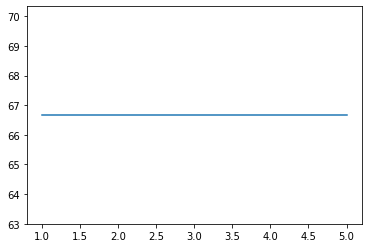

In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 5
torch.cuda.empty_cache()
model = RNNDepressionClassifier(vocab_size = 2142,
                                    num_classes = 2, 
                                    embedding_dim = 300, 
                                    hidden_size = 100, 
                                    num_layers = 2,
                                use_glove = glove_vector,
                                freeze_glove = False)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.NLLLoss()
if using_GPU:
    model.cuda()
    loss_function.to('cuda')
accuracies=[]
for epoch in range(1, EPOCHS + 1):
    train_an_epoch(dataloader = train_dataloader,
                    model = model,
                    optimizer = optimizer, 
                    loss_fn=loss_function,
                    using_GPU = using_GPU)
    accuracy = get_accuracy(val_dataloader, model)
    if accuracy > best_accuracy:
            best_accuracy = accuracy
            with open("/content/drive/MyDrive/Repos/DepressionDetection/output/biLSTM_glove_best_split.pt", 'wb') as f:
                torch.save(model, f)
                print("New best model saved!")
    
    accuracies.append(accuracy)
    print()
    print(f'After epoch {epoch} the validation accuracy is {accuracy:.3f}.')
    print()
    
plt.plot(range(1, EPOCHS+1), accuracies)

# TF - IDF

In [23]:
def collate_fn_tfidf(batch):
  tf_idf_matrix = torch.zeros(len(batch), tf_idf.shape[1])
  labels = []
  for i, (index, text, label) in enumerate(batch):
    tf_idf_matrix[i] = tf_idf[index]
    labels.append(label)
  return torch.tensor(labels).to("cuda"), tf_idf_matrix.to("cuda")

In [9]:
depression_data = dep_data(data_dir, pandas = True)

In [10]:
depression_data.split_data(123, pandas = True)

In [11]:
tf_idf, labels = create_tf_idf(depression_data.all_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
depression_data.train["class"] = depression_data.train["class"].map(LABEL_MAPPINGS)
depression_data.val["class"] = depression_data.val["class"].map(LABEL_MAPPINGS)

In [24]:
train_dataloader = DataLoader(depression_data.train.values.tolist(), batch_size=64,
                              shuffle=True, 
                              collate_fn=collate_fn_tfidf)
val_dataloader = DataLoader(depression_data.val.values.tolist(), batch_size=64,
                              shuffle=True, 
                              collate_fn=collate_fn_tfidf)

At iteration 200 the loss is 0.694.
At iteration 400 the loss is 0.691.
At iteration 600 the loss is 0.693.
At iteration 800 the loss is 0.691.
At iteration 1000 the loss is 0.696.
At iteration 1200 the loss is 0.693.
At iteration 1400 the loss is 0.697.
At iteration 1600 the loss is 0.693.
At iteration 1800 the loss is 0.691.
At iteration 2000 the loss is 0.672.
At iteration 2200 the loss is 0.684.
New best model saved!

After epoch 1 the validation accuracy is 50.000.

At iteration 200 the loss is 0.682.
At iteration 400 the loss is 0.693.
At iteration 600 the loss is 0.678.
At iteration 800 the loss is 0.695.
At iteration 1000 the loss is 0.686.
At iteration 1200 the loss is 0.706.
At iteration 1400 the loss is 0.687.
At iteration 1600 the loss is 0.693.
At iteration 1800 the loss is 0.692.
At iteration 2000 the loss is 0.693.
At iteration 2200 the loss is 0.694.
New best model saved!

After epoch 2 the validation accuracy is 58.333.

At iteration 200 the loss is 0.698.
At iteration

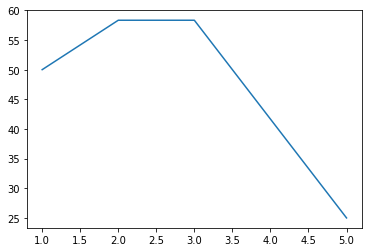

In [26]:
import matplotlib.pyplot as plt
EPOCHS = 5
using_GPU = True
torch.cuda.empty_cache()
model = RNNDepressionClassifier(vocab_size = len(tf_idf),
                                    num_classes = 2, 
                                    embedding_dim = 300, 
                                    hidden_size = 100, 
                                    num_layers = 2,
                                use_glove = None,
                                freeze_glove = False)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.NLLLoss()
best_accuracy = 0
if using_GPU:
    model.cuda()
    loss_function.to('cuda')
accuracies=[]
for epoch in range(1, EPOCHS + 1):
    train_an_epoch(dataloader = train_dataloader,
                    model = model,
                    optimizer = optimizer, 
                    loss_fn=loss_function,
                    using_GPU = using_GPU)
    accuracy = get_accuracy(val_dataloader, model)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      with open("/content/drive/MyDrive/Repos/DepressionDetection/output/biLSTM_tf_idf_best.pt", 'wb') as f:
          torch.save(model, f)
          print("New best model saved!")
    
    accuracies.append(accuracy)
    print()
    print(f'After epoch {epoch} the validation accuracy is {accuracy:.3f}.')
    print()
    
plt.plot(range(1, EPOCHS+1), accuracies)